# Day 6

In [28]:
data = \
'''Time:        38     67     76     73
Distance:   234   1027   1157   1236'''

sample_data = \
'''Time:      7  15   30
Distance:  9  40  200'''

In [29]:
def parse_data_1(data_string):
    data = data_string.splitlines()
    time = list(map(int, data[0].split()[1:]))
    distance = list(map(int, data[1].split()[1:]))
    
    return [(time[i], distance[i]) for i in range(len(time))]

def parse_data_2(data_string):
    data = data_string.splitlines()
    data = [item.replace(' ', '').split(':') for item in data]
    data = [[int(subitem)] for item in data for subitem in item if subitem.isdigit()]
    
    return [(data[0][i], data[1][i]) for i in range(len(data[0]))]


## Formulas
- distance = tx -x^2

    `0 = -x^2 + tx - distance`

- t is time total game time
- x is time holding boat

In [30]:
import math as m

def times_greater_than_record(game_time, record_distance):
    # equation will give distance for each time
    # solve for hold times when distance is equal to record
    a = -1
    b = game_time
    c = -record_distance
    
    # quadratic formula
    sol1 = (-b + m.sqrt(b**2 - 4*a*c)) / (2*a)
    sol2 = (-b - m.sqrt(b**2 - 4*a*c)) / (2*a)

    # get min and max times from solutions
    min = m.floor(sol1) + 1
    max = m.ceil(sol2) - 1

    # return total number of times greater than record
    return max - min + 1

def solve(parsed_data):
    results = [times_greater_than_record(race[0], race[1]) for race in parsed_data]
    # print(results)
    return m.prod(results)
    

In [31]:
import datetime
import time
start_time = time.time()
# print('Start:', datetime.datetime.now())

# print('Part 1:')
# print('sample solution:', solve(parse_data_1(sample_data)))
print('solution 1:', solve(parse_data_1(data)))

# print('\nPart 2:')

# print('sample solution:', solve(parse_data_2(sample_data)))
print('solution 2:', solve(parse_data_2(data)))

print("--- %s ms ---" % ((time.time() - start_time) * 1000))
# print('End:', datetime.datetime.now())

solution 1: 303600
solution 2: 23654842
--- 0.1068115234375 ms ---


### Plotting

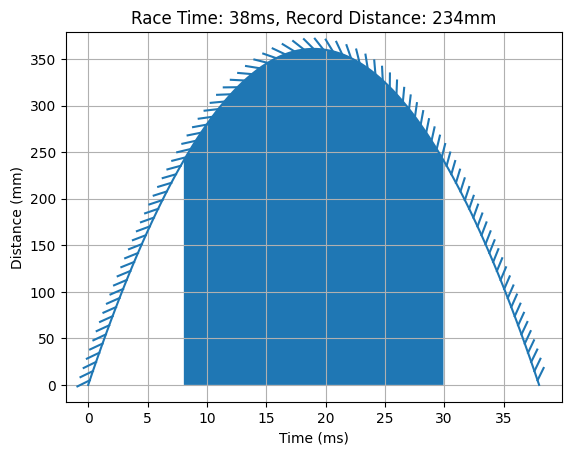

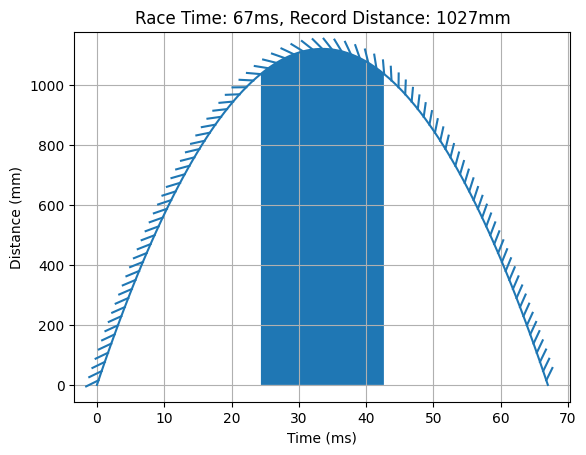

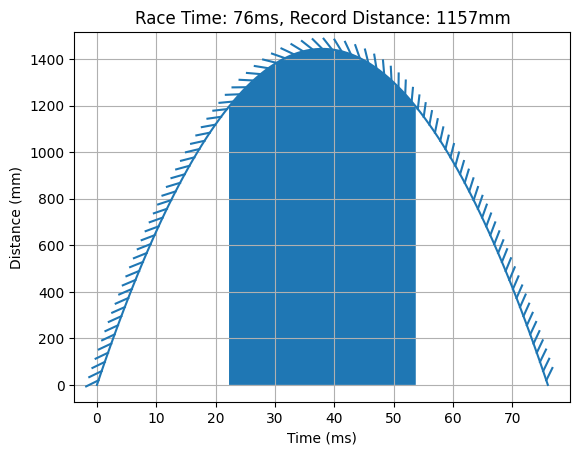

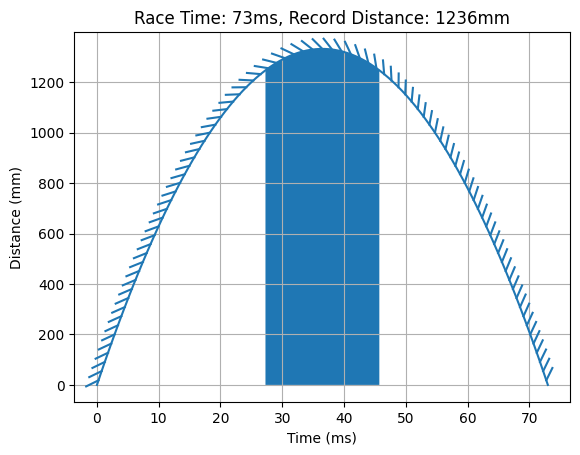

[None, None, None, None]

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib.gridspec as gridspec


def times_greater_than_record(game_time, record_distance):
    # equation will give distance for each time
    # solve for hold times when distance is equal to record
    a = -1
    b = game_time
    c = -record_distance
    
    # quadratic formula
    sol1 = (-b + m.sqrt(b**2 - 4*a*c)) / (2*a)
    sol2 = (-b - m.sqrt(b**2 - 4*a*c)) / (2*a)

    # get min and max times from solutions
    min = m.floor(sol1) + 1
    max = m.ceil(sol2) - 1

    # return total number of times greater than record
    return (min, max)

def plot_race(game_time, record_distance):

    bounds = times_greater_than_record(game_time, record_distance)
    # print(bounds)

    x = np.linspace(0, game_time, 100)
    y = -x**2 + game_time * x

    plt.plot(x, y, path_effects=[patheffects.withTickedStroke(spacing=7, angle=135)])
    plt.fill_between(x, y, where=(x > bounds[0]) & (x < bounds[1]))
    plt.xlabel('Time (ms)')
    plt.ylabel('Distance (mm)')
    plt.title('Race Time: ' + str(game_time) + 'ms, Record Distance: ' + str(record_distance) + 'mm')
    plt.grid(True)
    plt.show()


# fig.add_subplot(gs[0, 0])

my_data = parse_data_1(data)
[plot_race(race[0], race[1]) for race in my_data]